# Gene expression cancer RNA-Seq Data Set - Multi-class classification

#### Zhanyang Zhu Zhanyang.Zhu@Gmail.com 10/18/2022 for UCSD Machine Learning Bootcamp Capstone Project 

## Goal: 
>### Train multi-class classification models to determine a cancer type given gene expression data of a patient. 
>### In this exercise, the cancer types are limited to BRCA, KIRC, COAD, LUAD and PRAD, SKCM, THCA, LGG. More cancer types can be included.
>### TCGA Study Abbreviations https://gdc.cancer.gov/resources-tcga-users/tcga-code-tables/tcga-study-abbreviations

### Multi-class classification: 
>#### It is classification with more than two classes. In multi class classification, each sample is assigned to one and only one target label. Eg: An animal can be cat or dog but not both at the same time (https://analyticsindiamag.com/7-types-classification-algorithms/)
>#### K-Nearest Neighbours, Logistic Regression, Naïve Bayes, Stochastic Gradient Descent, Decision Tree, Random Forest, and Support Vector Machine

## Background: 
>### This project was inspired by a similar UCI data set - a random extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD
>#### https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq
 

## Data Selection: 
>### For this UCSD Data Bootcamp projects, I downloaded five data sets from https://www.synapse.org/#!Synapse:syn2812961. All five data sets are Illumina HiSeq RNASeq V2 data collected by unc.edu:
>#### 1. unc.edu_BRCA_IlluminaHiSeq_RNASeqV2.geneExp.tsv - BRCA: Breast invasive carcinoma
>#### 2. unc.edu_COAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv - COAD: Colon adenocarcinoma
>#### 3. unc.edu_KIRC_IlluminaHiSeq_RNASeqV2.geneExp.tsv - KIRC: Kidney renal clear cell carcinoma
>#### 4. unc.edu_LUAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv - LUAD: Lung adenocarcinoma
>#### 5. unc.edu_PRAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv - PRAD: Prostate adenocarcinoma
>#### 6. unc.edu_SKCM_IlluminaHiSeq_RNASeqV2.geneExp.tsv - SKCM: Skin Cutaneous Melanoma
>#### 7. unc.edu_THCA_IlluminaHiSeq_RNASeqV2.geneExp.tsv - THCA: Thyroid carcinoma
>#### 8. unc.edu_LGG_IlluminaHiSeq_RNASeqV2.geneExp.tsv - LGG: Brain Lower Grade Glioma 

### Data Set Information:

>#### Samples (instances) are stored column-wise. Variables (attributes in rows) of each sample are RNA-Seq gene expression levels measured by illumina HiSeqV2 platform.


### Relevant Papers:

>####  Weinstein, John N., et al. 'The cancer genome atlas pan-cancer analysis project.' Nature genetics 45.10 (2013): 1113-1120.

In [3]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,8)

In [4]:
unc_BRCA = pd.read_csv('UNC.EDU/unc.edu_BRCA_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_COAD = pd.read_csv('UNC.EDU/unc.edu_COAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_KIRC = pd.read_csv('UNC.EDU/unc.edu_KIRC_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_LUAD = pd.read_csv('UNC.EDU/unc.edu_LUAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_PRAD = pd.read_csv('UNC.EDU/unc.edu_PRAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_SKCM = pd.read_csv('UNC.EDU/unc.edu_SKCM_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_THCA = pd.read_csv('UNC.EDU/unc.edu_THCA_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_LGG = pd.read_csv('UNC.EDU/unc.edu_LGG_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])

In [5]:
unc_BRCA.head()

,TCGA-3C-AAAU-01A-11R-A41B-07,TCGA-3C-AALI-01A-11R-A41B-07,TCGA-3C-AALJ-01A-31R-A41B-07,TCGA-3C-AALK-01A-11R-A41B-07,TCGA-4H-AAAK-01A-12R-A41B-07,TCGA-5L-AAT0-01A-12R-A41B-07,TCGA-5L-AAT1-01A-12R-A41B-07,TCGA-5T-A9QA-01A-11R-A41B-07,TCGA-A1-A0SB-01A-11R-A144-07,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A1-A0SE-01A-11R-A084-07,TCGA-A1-A0SF-01A-11R-A144-07,TCGA-A1-A0SG-01A-11R-A144-07,TCGA-A1-A0SH-01A-11R-A084-07,TCGA-A1-A0SI-01A-11R-A144-07,TCGA-A1-A0SJ-01A-11R-A084-07,TCGA-A1-A0SK-01A-12R-A084-07,TCGA-A1-A0SM-01A-11R-A084-07,TCGA-A1-A0SN-01A-11R-A144-07,TCGA-A1-A0SO-01A-22R-A084-07,TCGA-A1-A0SP-01A-11R-A084-07,TCGA-A1-A0SQ-01A-21R-A144-07,TCGA-A2-A04N-01A-11R-A115-07,TCGA-A2-A04P-01A-31R-A034-07,TCGA-A2-A04Q-01A-21R-A034-07,TCGA-A2-A04R-01A-41R-A109-07,TCGA-A2-A04T-01A-21R-A034-07,TCGA-A2-A04U-01A-11R-A115-07,TCGA-A2-A04V-01A-21R-A034-07,TCGA-A2-A04W-01A-31R-A115-07,TCGA-A2-A04X-01A-21R-A034-07,TCGA-A2-A04Y-01A-21R-A034-07,TCGA-A2-A0CK-01A-11R-A22K-07,TCGA-A2-A0CL-01A-11R-A115-07,TCGA-A2-A0CM-01A-31R-A034-07,TCGA-A2-A0CO-01A-13R-A22K-07,TCGA-A2-A0CP-01A-11R-A034-07,TCGA-A2-A0CQ-01A-21R-A034-07,TCGA-A2-A0CR-01A-11R-A22K-07,TCGA-A2-A0CS-01A-11R-A115-07,TCGA-A2-A0CT-01A-31R-A056-07,TCGA-A2-A0CU-01A-12R-A034-07,TCGA-A2-A0CV-01A-31R-A115-07,TCGA-A2-A0CW-01A-21R-A115-07,TCGA-A2-A0CX-01A-21R-A00Z-07,TCGA-A2-A0CY-01A-12R-A034-07,TCGA-A2-A0CZ-01A-11R-A034-07,TCGA-A2-A0D0-01A-11R-A00Z-07,TCGA-A2-A0D1-01A-11R-A034-07,TCGA-A2-A0D2-01A-21R-A034-07,...,TCGA-OL-A5D6-01A-21R-A27Q-07,TCGA-OL-A5D7-01A-11R-A27Q-07,TCGA-OL-A5D8-01A-11R-A27Q-07,TCGA-OL-A5DA-01A-11R-A27Q-07,TCGA-OL-A5RU-01A-11R-A28M-07,TCGA-OL-A5RV-01A-12R-A28M-07,TCGA-OL-A5RW-01A-11R-A28M-07,TCGA-OL-A5RX-01A-11R-A28M-07,TCGA-OL-A5RY-01A-21R-A28M-07,TCGA-OL-A5RZ-01A-11R-A28M-07,TCGA-OL-A5S0-01A-11R-A28M-07,TCGA-OL-A66H-01A-11R-A29R-07,TCGA-OL-A66I-01A-21R-A29R-07,TCGA-OL-A66J-01A-11R-A29R-07,TCGA-OL-A66K-01A-11R-A29R-07,TCGA-OL-A66L-01A-12R-A31O-07,TCGA-OL-A66N-01A-12R-A31O-07,TCGA-OL-A66O-01A-11R-A31O-07,TCGA-OL-A66P-01A-11R-A31O-07,TCGA-OL-A6VO-01A-12R-A33J-07,TCGA-OL-A6VQ-01A-12R-A41B-07,TCGA-OL-A6VR-01A-32R-A33J-07,TCGA-OL-A97C-01A-32R-A41B-07,TCGA-PE-A5DC-01A-12R-A27Q-07,TCGA-PE-A5DD-01A-12R-A27Q-07,TCGA-PE-A5DE-01A-11R-A27Q-07,TCGA-PL-A8LV-01A-21R-A41B-07,TCGA-PL-A8LX-01A-11R-A41B-07,TCGA-PL-A8LY-01A-11R-A41B-07,TCGA-PL-A8LZ-01A-31R-A36F-07,TCGA-S3-A6ZF-01A-32R-A32P-07,TCGA-S3-A6ZG-01A-22R-A32P-07,TCGA-S3-A6ZH-01A-22R-A32P-07,TCGA-S3-AA0Z-01A-11R-A41B-07,TCGA-S3-AA10-01A-21R-A41B-07,TCGA-S3-AA11-01A-31R-A41B-07,TCGA-S3-AA12-01A-11R-A41B-07,TCGA-S3-AA14-01A-11R-A41B-07,TCGA-S3-AA15-01A-11R-A41B-07,TCGA-S3-AA17-01A-11R-A41B-07,TCGA-UL-AAZ6-01A-11R-A41B-07,TCGA-UU-A93S-01A-21R-A41B-07,TCGA-V7-A7HQ-01A-11R-A33J-07,TCGA-W8-A86G-01A-21R-A36F-07,TCGA-WT-AB41-01A-11R-A41B-07,TCGA-WT-AB44-01A-11R-A41B-07,TCGA-XX-A899-01A-11R-A36F-07,TCGA-XX-A89A-01A-11R-A36F-07,TCGA-Z7-A8R5-01A-42R-A41B-07,TCGA-Z7-A8R6-01A-11R-A41B-07
gene_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
?|100130426,0.0000,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0203,0.0000,0.0000,0.0000,0.0000,0.0000,0.4618,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4254,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
?|100133144,16.3644,9.2659,11.6228,12.0894,6.8468,3.9889,0.0000,1.4644,15.3396,9.5178,10.0370,10.2517,6.0625,1.6902,3.7905,1.6424,50.5641,6.5562,12.5818,12.5687,11.7293,0.5769,5.3011,1.2241,1.1801,3.6258,16.6878,0.0000,4.5142,1.3076,1.4779,9.4446,0.9980,10.7672,19.7115,

In [6]:
# transpose the data to give samples in row and features in column
unc_BRCA_t = unc_BRCA.T
unc_COAD_t = unc_COAD.T
unc_KIRC_t = unc_KIRC.T
unc_LUAD_t = unc_LUAD.T
unc_PRAD_t = unc_PRAD.T
unc_SKCM_t = unc_SKCM.T
unc_THCA_t = unc_THCA.T
unc_LGG_t = unc_LGG.T
#
# add label for each data set:
#
unc_BRCA_t[['label']] = 'BRCA'
unc_COAD_t[['label']] = 'COAD'
unc_KIRC_t[['label']] = 'KIRC'
unc_LUAD_t[['label']] = 'LUAD'
unc_PRAD_t[['label']] = 'PRAD'
unc_SKCM_t[['label']] = 'SKCM'
unc_THCA_t[['label']] = 'THCA'
unc_LGG_t[['label']] = 'LGG'
# combine the data sets together:
#
unc_mix8 = pd.concat([unc_BRCA_t, unc_COAD_t, unc_KIRC_t, unc_LUAD_t, unc_PRAD_t, unc_SKCM_t, unc_THCA_t, unc_LGG_t])

In [7]:
print("Number of samples: ")
print('  BRCA=' + str(len(unc_BRCA_t)))
print('  COAD= ' + str(len(unc_COAD_t)))
print('  KIRC= ' + str(len(unc_KIRC_t)))
print('  LUAD= ' + str(len(unc_LUAD_t)))
print('  PRAD= ' + str(len(unc_PRAD_t)))
print('  SKCM= ' + str(len(unc_SKCM_t)))
print('  THCA= ' + str(len(unc_THCA_t)))
print('  LGG= ' + str(len(unc_LGG_t)))
print(' total='+str(len(unc_mix8)))

Number of samples: 
  BRCA=1218
  COAD= 329
  KIRC= 606
  LUAD= 576
  PRAD= 550
  SKCM= 474
  THCA= 572
  LGG= 534
 total=4859


Text(0, 0.5, '# of samples')

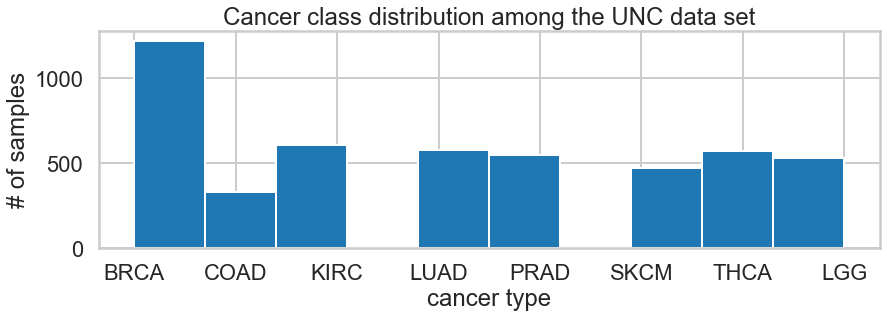

In [8]:
# Cancer class distribution among the UNC data set
plt.rcParams["figure.figsize"] = (14,4)
plt.title('Cancer class distribution among the UNC data set')
plt.hist(unc_mix8.label)
plt.xlabel('cancer type')
plt.ylabel('# of samples')

In [9]:
unc_BRCA_t.describe()

gene_id,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,?|340602,?|388795,?|390284,?|391343,?|391714,?|404770,?|441362,?|442388,?|553137,?|57714,?|645851,?|652919,?|653553,?|728045,?|728603,?|728788,?|729884,?|8225,?|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACSL|729522,AACS|65985,AADACL2|344752,AADACL3|126767,AADACL4|343066,AADAC|13,AADAT|51166,AAGAB|79719,AAK1|22848,AAMP|14,AANAT|15,...,ZNRF2|223082,ZNRF3|84133,ZNRF4|148066,ZP1|22917,ZP2|7783,ZP3|7784,ZP4|57829,ZPBP2|124626,ZPBP|11055,ZPLD1|131368,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN12P1|221584,ZSCAN12|9753,ZSCAN16|80345,ZSCAN18|65982,ZSCAN1|284312,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN29|146050,ZSCAN2|54993,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.0,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,...,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.00000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,0.011215,8.671326,7.697737,113.498893,1055.816748,0.0,230.907261,0.526511,0.125719,0.023140,6.972629,1.588953,6.138664,0.568637,0.217794,0.002713,0.002062,0.012716,3.036983,858.114150,12.619481,23.663710,444.887241,0.000391,0.114834,0.556722,39.549158,532.321036,48.160794,188.215477,0.237625,3.866745,94.694529,254.286282,16556.131558,362.476682,0.882392,0.098957,713.824789,3.372221,1175.326596,0.816770,0.771061,0.058016,21.386740,89.586357,1629.140099,949.078273,2446.431507,0.464144,...,759.611916,443.418397,0.029193,5.244548,13.145472,228.177375,1.813849,1.443102,0.138697,46.429507,1137.268290,1412.516175,88.068926,318.093755,0.441062,53.967131,176.813884,165.797048,1133.795937,15.541919,83.036334,249.830591,136.018866,22.331833,533.006698,306.509373,2.270729,65.335547,1.491521,310.674923,0.063194,124.203331,443.641410,141.759406,409.939392,286.401247,195.054448,498.158654,455.310955,794.663520,66.763487,579.66591,1127.123562,105.461434,941.076923,4011.017305,1289.998543,984.442944,208.672295,0.116460
std,0.098578,7.657302,5.845470,59.044078,459.067089,0.0,186.532512,0.634348,2.004148,0.530771,145.235082,2.293605,3.502436,1.846640,0.388289,0.039583,0.040682,0.114725,10.949658,774.136152,12.064101,33.789605,624.476651,0.013653,0.663363,1.713830,354.912811,321.610407,60.702753,291.510876,3.604368,79.280805,53.850240,1171.882427,17592.747273,341.394046,1.371249,1.281274,217.823109,30.269483,1024.874751,7.390838,4.903481,0.238947,215.703783,173.605418,677.742088,328.516320,807.206843,1.473874,...,393.390348,1107.293102,0.483217,17.367224,132.493470,177.275066,18.222269,35.803912,0.380413,569.589339,537.726776,462.40

In [10]:
unc_mix8.describe()

gene_id,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,?|340602,?|388795,?|390284,?|391343,?|391714,?|404770,?|441362,?|442388,?|553137,?|57714,?|645851,?|652919,?|653553,?|728045,?|728603,?|728788,?|729884,?|8225,?|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACSL|729522,AACS|65985,AADACL2|344752,AADACL3|126767,AADACL4|343066,AADAC|13,AADAT|51166,AAGAB|79719,AAK1|22848,AAMP|14,AANAT|15,...,ZNRF2|223082,ZNRF3|84133,ZNRF4|148066,ZP1|22917,ZP2|7783,ZP3|7784,ZP4|57829,ZPBP2|124626,ZPBP|11055,ZPLD1|131368,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN12P1|221584,ZSCAN12|9753,ZSCAN16|80345,ZSCAN18|65982,ZSCAN1|284312,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN29|146050,ZSCAN2|54993,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.00000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.00000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.00000,...,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.00000,4859.000000,4859.000000,4859.000000
mean,0.019137,8.804371,9.946737,126.202266,881.626507,0.000055,243.665617,0.583563,0.210954,0.006088,4.445372,1.50385,6.734141,0.602679,0.288103,0.005802,0.002116,0.023938,57.963724,633.289676,12.209368,18.845937,396.880092,0.000098,1.118261,1.235998,64.913933,714.787183,46.546501,141.111525,34.493871,67.401479,122.210317,124.103023,20654.74843,446.453854,3.495624,0.338613,761.546492,7.370175,850.048691,1.138926,1.433994,0.187612,24.329327,169.941230,1121.267040,1187.212750,2675.482088,1.05999,...,588.455676,599.575475,0.112958,7.642420,5.051350,202.271167,0.894551,1.019641,0.169155,18.641693,984.498210,1374.102206,71.268157,278.418448,1.018597,42.518409,191.685804,126.052426,1412.911593,18.088875,64.677656,243.920000,117.654315,36.683975,470.439371,262.636157,3.631349,68.695170,1.789870,293.085822,0.316981,123.967192,420.125325,285.435906,465.377857,324.885714,163.025594,395.572462,325.013842,511.209529,62.667747,434.805875,1100.636202,53.844874,1036.682788,3831.068673,1352.70052,811.829277,209.243054,0.087035
std,0.101665,8.114689,9.138943,63.548653,367.781962,0.003839,220.551222,0.748920,1.984130,0.266593,79.486604,6.71785,4.081106,3.018727,2.082659,0.057160,0.041821,0.202317,188.067339,567.580314,11.990903,29.095458,468.723886,0.006836,10.481889,2.752970,381.017641,359.533899,73.903495,242.660197,96.370751,357.675409,170.439389,826.450461,26432.60218,478.472530,46.515409,1.779301,250.449584,32.726836,647.981709,13.208353,78.394415,0.692273,188.108855,207.734384,543.700783,706.016184,789.809051,2.95701,...,371.669106,674.927490,0.773602,28.261632,104.228115,187.867821,11.260629,20.191951,0.427269,296.425059,401.8

In [11]:
unc_mix8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4859 entries, TCGA-3C-AAAU-01A-11R-A41B-07 to TCGA-WY-A85E-01A-11R-A36H-07
Columns: 20532 entries, ?|100130426 to label
dtypes: float64(20531), object(1)
memory usage: 761.2+ MB


C:\Users\Zhanyang\AppData\Local\Temp\ipykernel_1536\248007343.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unc_mix8.groupby(['label'])['?|100133144', '?|100134869', 'ZW10|9183','ZWILCH|55055', 'ZWINT|11130', 'ZXDA|7789'].mean().plot()


Text(0, 0.5, 'gene expression mean value')

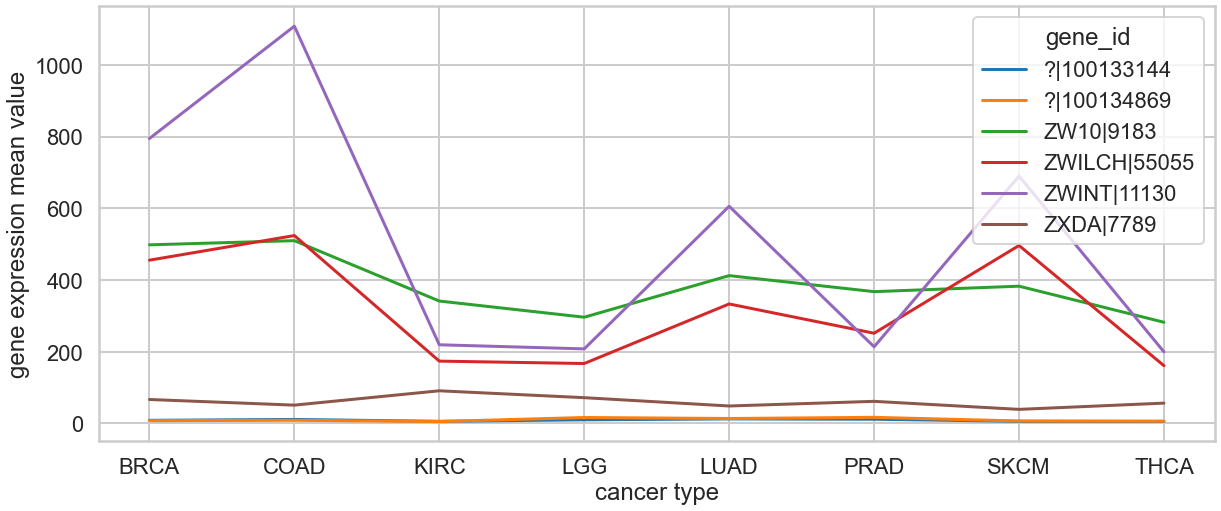

In [12]:
# gene expression mean by cancer type for gene ids - '?|100133144', '?|100134869', 'ZW10|9183','ZWILCH|55055', 'ZWINT|11130', 'ZXDA|7789'
plt.rcParams["figure.figsize"] = (20,8)
unc_mix8.groupby(['label'])['?|100133144', '?|100134869', 'ZW10|9183','ZWILCH|55055', 'ZWINT|11130', 'ZXDA|7789'].mean().plot()
plt.xlabel("cancer type")
plt.ylabel("gene expression mean value")

>#### In the plot above, we can see the 'ZWINT|11130' gene (the purple line) shows big mean changes for the five cancer types.

>#### Feature selections:  mean expression level for each cancer type?  the minimal of the means no less than X? 

In [13]:
unc_mix8.columns = unc_mix8.columns.str.replace('\?\|', 'NA|')

C:\Users\Zhanyang\AppData\Local\Temp\ipykernel_1536\746091344.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  unc_mix8.columns = unc_mix8.columns.str.replace('\?\|', 'NA|')


In [14]:
unc_mix8.head()

gene_id,NA|100130426,NA|100133144,NA|100134869,NA|10357,NA|10431,NA|136542,NA|155060,NA|26823,NA|280660,NA|317712,NA|340602,NA|388795,NA|390284,NA|391343,NA|391714,NA|404770,NA|441362,NA|442388,NA|553137,NA|57714,NA|645851,NA|652919,NA|653553,NA|728045,NA|728603,NA|728788,NA|729884,NA|8225,NA|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACSL|729522,AACS|65985,AADACL2|344752,AADACL3|126767,AADACL4|343066,AADAC|13,AADAT|51166,AAGAB|79719,AAK1|22848,AAMP|14,AANAT|15,...,ZNRF3|84133,ZNRF4|148066,ZP1|22917,ZP2|7783,ZP3|7784,ZP4|57829,ZPBP2|124626,ZPBP|11055,ZPLD1|131368,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN12P1|221584,ZSCAN12|9753,ZSCAN16|80345,ZSCAN18|65982,ZSCAN1|284312,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN29|146050,ZSCAN2|54993,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,label
TCGA-3C-AAAU-01A-11R-A41B-07,0.0000,16.3644,12.9316,52.1503,408.076,0.0,1187.010,0.0000,0.0000,0.0,1.7233,0.3447,4.1359,0.0000,0.6893,0.0,0.0,0.0,3.7912,820.977,124.4220,25.8494,289.513,0.0,0.0,0.0000,109.6020,458.396,40.6697,197.090,0.0000,0.0000,102.9630,1.3786,5798.37,68.2424,8.6165,0.3447,649.337,1.3786,1087.400,0.0,0.0000,0.0,0.0000,5.5145,1300.40,517.333,2053.13,0.3447,...,741.706,0.0,3.7912,0.0000,411.791,0.0000,0.3447,1.034,53.7668,879.225,2504.080,72.0337,421.862,2.7573,128.1790,141.6550,225.062,132.349,0.3447,158.8880,253.510,300.887,38.2571,960.220,582.473,0.3447,32.3979,1.0340,431.513,0.3447,180.2570,489.416,454.9500,621.764,194.108,89.956,430.824,415.824,931.957,129.5920,1007.780,1658.500,258.4940,1208.370,3507.25,1894.930,1180.460,1.7233,0.0,BRCA
TCGA-3C-AALI-01A-11R-A41B-07,0.0000,9.2659,17.3790,69.7553,563.893,0.0,516.041,1.0875,0.5438,0.0,144.1000,4.8940,1.6313,8.1566,0.5438,0.0,0.0,0.0,0.0000,708.537,142.4690,13.3388,449.701,0.0,0.0,0.0000,3.8064,683.524,29.9076,237.384,0.0000,0.0000,70.8646,4.3502,7571.98,157.6940,0.5438,0.0000,887.983,35.3453,836.324,0.0,0.0000,0.0,1.0875,24.4698,3541.05,848.287,2979.88,2.1751,...,373.573,0.0,30.4513,4.3502,439.222,0.5438,2.1751,0.000,3.2626,566.068,627.656,62.5340,349.647,0.0000,58.2164,91.8978,174.551,1549.760,18.4883,27.7325,698.521,197.390,7.0691,588.363,236.542,0.0000,127.7870,4.3502,507.341,0.0000,139.2060,475.802,113.6490,242.523,217.134,105.492,340.402,1161.330,965.198,59.8151,448.613,1343.120,198.4770,603.589,5504.62,1318.650,406.743,926.5910,0.0,BRCA
TCGA-3C-AALJ-01A-31R-A41B-07,0.9066,11.6228,9.2294,154.2970,1360.830,0.0,592.022,0.0000,0.0000,0.0,0.0000,2.7199,2.7199,0.0000,0.0000,0.0,0.0,0.0,0.9066,391.659,34.4515,0.0000,1100.630,0.0,0.0,0.9066,0.0000,657.298,22.6655,423.237,0.9066,0.0000,161.2600,0.0000,8840.40,573.8890,0.0000,0.0000,723.481,2.7199,1533.090,0.0,1.8132,0.0,0.9066,53.4905,1360.83,568.450,2291.93,1.8132,...,257.480,0.0,2.7199,0.0000,334.506,0.0000,0.0000,0.000,117.8600,1125.110,1951.210,35.3581,470.535,0.0000,38.2684,99.7280,110.607,2225.750,112.4210,52.5839,282.865,138.713,46.2375,514.053,268.359,0.0000,62.5567,0.0000,352.675,0.0000,81.5956,485.947,180.4170,506.800,164.234,235.721,304.624,305.422,2531.280,35.3581,533.998,768.812,331.8220,532.185,5458.75,942.883,509.519,35.3581,0.0,BRCA
TCGA-3C-AALK-01A-11R-A41B-07,0.0000,12.0894,11.0799,143.8640,865.536,0.0,552.751,0.4137,0.0000,0.0,0.0000,2.0687,4.5511,0.0000,0.0000,0.0,0.0,0.0,0.0000,458.006,15.7220,0.0000,406.289,0.0,0.0,1.2412,34.7538,786.512,54.1994,191.018,0.0000,0.0000,62.5072,1.6549,10960.20,506.4130,0.0000,0.0000,776.996,0.0000,858.088,0.0,0.0000,0.0,2.8962,57.0956,1683.49,727.762,2762.52,0.4137,...,330.161,0.0,1.2412,1.6549,127.017,0.4137,0.0000,0.000,9.1022,780.306,1195.830,61.2329,364.501,0.8275,33.4506,211.8330,163.012,1276.380,6.206

Text(0.5, 1.0, 'Mean Gene Expression Values')

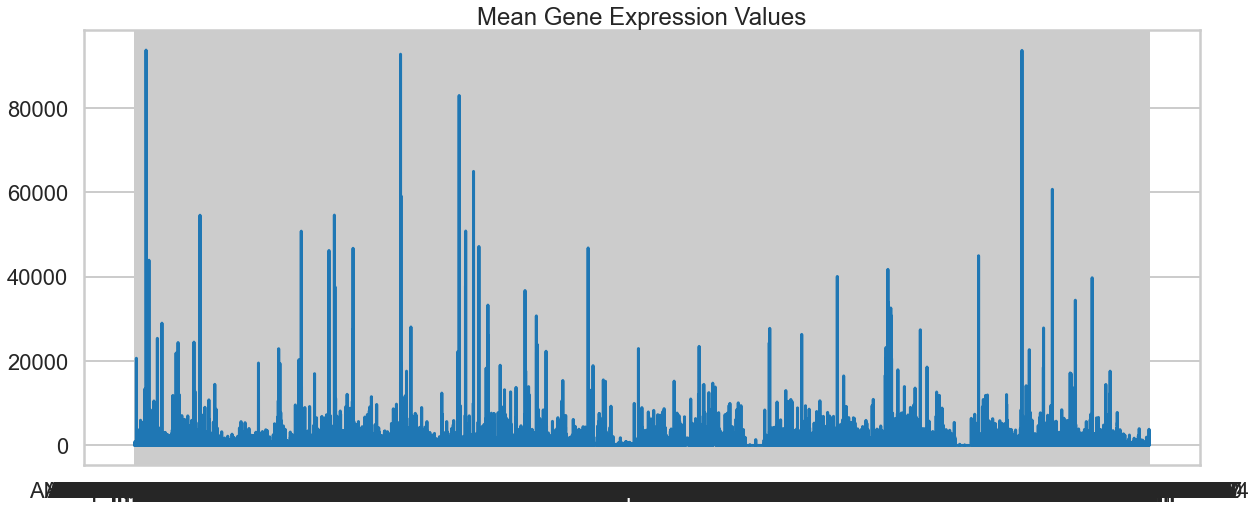

In [15]:
plt.plot(unc_mix8.mean(numeric_only=True))
plt.title('Mean Gene Expression Values')

In [16]:
unc_mix8.max(numeric_only=True)

gene_id
NA|100130426            2.0203
NA|100133144          104.6690
NA|100134869          118.8170
NA|10357             1119.1900
NA|10431             5009.5100
                       ...    
ZYX|7791            49294.8000
ZZEF1|23140          8672.3500
ZZZ3|26009           8174.3700
psiTPTE22|387590     9997.7700
tAKR|389932            40.2161
Length: 20531, dtype: float64

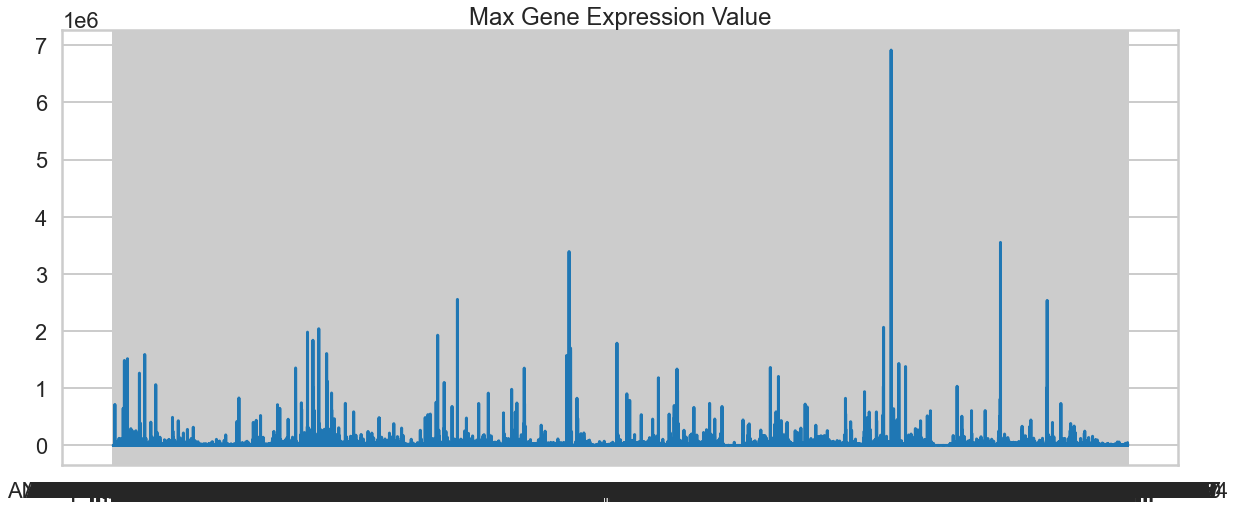

In [17]:
plt.title("Max Gene Expression Value")
plt.plot(unc_mix8.max(numeric_only=True))

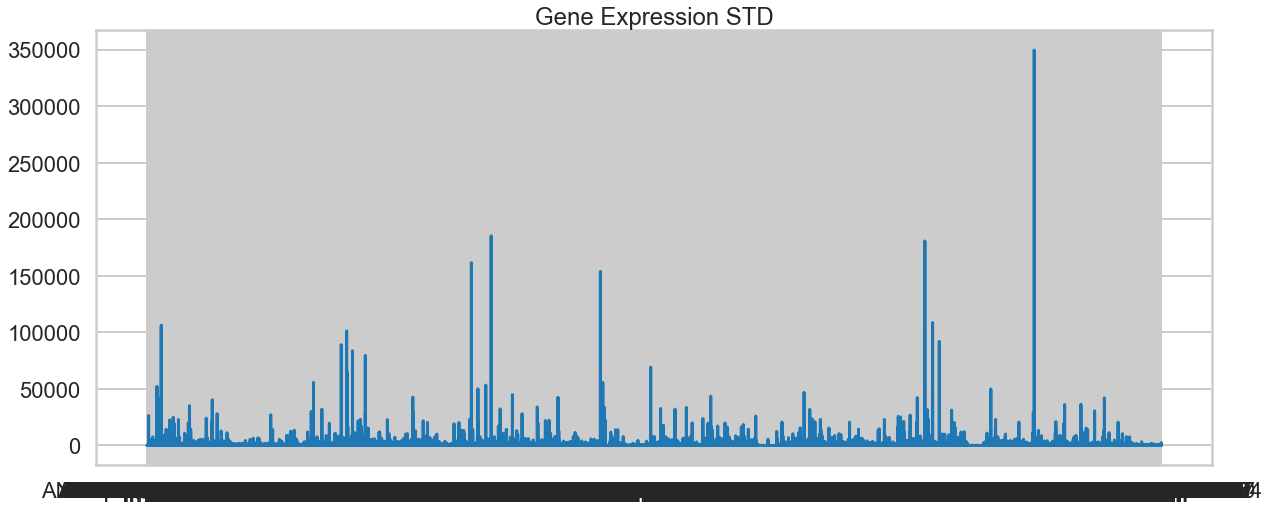

In [18]:
plt.title("Gene Expression STD")
plt.plot(unc_mix8.std(numeric_only=True))

In [19]:
sum(unc_mix8.max(numeric_only=True) < 10)

759

## Make a smaller data set to try multiple algorithms:

In [20]:
# here you get .50 % of the rows
unc_mix_small = unc_mix8.sample(frac = 0.4)

Text(0, 0.5, '# of samples')

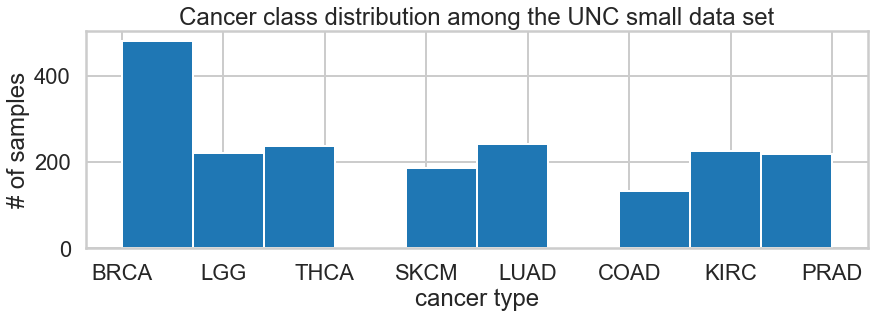

In [21]:
# Cancer class distribution among the UNC "small" data set
plt.rcParams["figure.figsize"] = (14,4)
plt.title('Cancer class distribution among the UNC small data set')
plt.hist(unc_mix_small.label)
plt.xlabel('cancer type')
plt.ylabel('# of samples')

In [22]:
unc_mix_small_label = unc_mix_small.pop('label')
unc_mix_small_label.head()

TCGA-BH-A0B1-01A-12R-A056-07    BRCA
TCGA-S9-A6WH-01A-12R-A33Z-07     LGG
TCGA-BH-A0W5-01A-11R-A109-07    BRCA
TCGA-EL-A3ZT-01A-12R-A23N-07    THCA
TCGA-EB-A3XB-01A-11R-A239-07    SKCM
Name: label, dtype: object

In [23]:
# unc_mix_small.drop(['label'], axis=1, inplace=True)
unc_mix_small.head()

gene_id,NA|100130426,NA|100133144,NA|100134869,NA|10357,NA|10431,NA|136542,NA|155060,NA|26823,NA|280660,NA|317712,NA|340602,NA|388795,NA|390284,NA|391343,NA|391714,NA|404770,NA|441362,NA|442388,NA|553137,NA|57714,NA|645851,NA|652919,NA|653553,NA|728045,NA|728603,NA|728788,NA|729884,NA|8225,NA|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACSL|729522,AACS|65985,AADACL2|344752,AADACL3|126767,AADACL4|343066,AADAC|13,AADAT|51166,AAGAB|79719,AAK1|22848,AAMP|14,AANAT|15,...,ZNRF2|223082,ZNRF3|84133,ZNRF4|148066,ZP1|22917,ZP2|7783,ZP3|7784,ZP4|57829,ZPBP2|124626,ZPBP|11055,ZPLD1|131368,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN12P1|221584,ZSCAN12|9753,ZSCAN16|80345,ZSCAN18|65982,ZSCAN1|284312,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN29|146050,ZSCAN2|54993,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
TCGA-BH-A0B1-01A-12R-A056-07,0.0,5.2608,8.1520,90.4583,853.949,0.0,141.207,0.7452,0.0000,0.0,0.3726,0.0000,8.1967,0.0000,0.0000,0.0,0.0,0.0,0.0000,1943.740,7.4516,24.0015,430.3280,0.0,0.0,0.0000,40.9836,239.568,62.5931,259.7470,0.0,0.7452,101.2000,111.7730,14215.70,532.0420,1.4903,0.3726,511.923,0.0000,658.346,3.7258,0.0,0.0,19.7466,27.5708,2220.190,913.934,2476.16,0.0000,...,968.703,600.223,0.0000,0.3726,0.0,138.0180,0.0000,0.0000,0.0000,0.3726,888.599,1753.61,103.5770,154.620,0.3726,71.6803,134.5010,115.4990,1716.4700,37.2578,83.4575,256.829,136.3640,10.4322,505.589,166.542,0.0000,43.9642,1.1177,225.037,0.0,59.9851,178.092,159.464,391.580,274.702,140.089,463.115,607.5560,752.981,51.7884,450.820,1063.71,208.2710,1223.920,1982.49,839.419,1036.510,39.1207,0.0
TCGA-S9-A6WH-01A-12R-A33Z-07,0.0,14.2926,26.0119,93.2428,566.846,0.0,472.802,1.5502,0.0000,0.0,7.2341,1.0334,6.2007,0.0000,1.5502,0.0,0.0,0.0,0.0000,131.248,26.8696,6.8001,68.2075,0.0,0.0,3.6171,0.0000,1156.940,6.7174,35.5713,0.0,153.4670,14.1221,69.7577,6632.12,57.8731,0.5167,0.0000,1210.680,2.5836,499.672,0.0000,0.0,0.0,0.5167,343.6210,542.043,860.862,4036.65,16.0184,...,185.504,448.000,1.5502,0.0000,0.0,74.9249,0.0000,0.0000,0.0000,2.0669,1408.070,1159.89,45.9884,228.909,0.0000,131.1440,293.4990,47.4662,2200.2100,89.9099,41.3379,327.680,94.0437,123.4970,622.135,233.559,0.0000,43.9215,3.1003,318.302,0.0,199.9720,683.109,530.675,415.446,636.609,233.559,315.202,71.0185,145.716,103.8620,592.682,1649.90,1.5502,877.397,1411.69,2568.120,386.509,8.7843,0.0
TCGA-BH-A0W5-01A-11R-A109-07,0.0,8.6956,5.1896,63.0216,789.722,0.0,331.163,1.0414,0.0000,0.0,0.6943,1.0414,4.5127,0.0000,1.0414,0.0,0.0,0.0,1.0414,1064.650,12.8438,8.0430,136.7690,0.0,0.0,0.0000,1.0414,485.636,82.2700,114.3860,0.0,0.3471,90.9829,3.1242,14196.50,378.7190,3.1242,0.3471,727.933,1.3885,903.234,0.0000,0.0,0.0,1.0414,33.6717,1934.910,1139.280,1961.29,0.6943,...,795.971,2418.460,0.0000,1.3885,0.0,184.5590,0.6943,1.0414,0.3471,6.5955,1164.970,1831.24,104.4860,281.523,0.0000,38.1184,225.6350,144.7430,1165.6600,31.2418,93.7253,216.148,132.6040,26.7291,572.765,331.163,0.0000,79.4929,2.0828,317.625,0.0,122.1900,304.086,216.609,326.303,366.990,175.648,519.307,336.6720,306.863,70.1204,516.530,1212.53,35.0602,883.100,3064.82,2192.130,960.510,44.0856,0.0
TCGA-EL-A3ZT-01A-12R-A23N-07,0.0,23.1692,12.2036,126.9760,879.496,0.0,682.132,1.6079,0.8039,0.0,0.0000,4.0196,8.8432,0.0000,0.4020,0.0,0.0,0.0,0.8039,698.613,24.5198,0.0000,402.7670,0.0,0.0,2.4118,58.2847,1133.940,24.9217,121.6910,0.0,0.4020,115.4600,0.4020,10199.40,705.0440,5.2255,0.0000,893.565,0.0000,486.376,0.0000,0.0,0.0,0.4020,120.1870,753.682,1596.200,2513.48,0.0000,...,888.741,631.485,0.0000,0.4020,0.0,46.3343,0.0000,0.0000,0.8039,7.2353,880.702,2414.50,40.1964,369.807,0.0000,30.2196,213.4430,143.4970,4053.800

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    unc_mix_small, unc_mix_small_label, test_size=0.25, random_state=42)

### Try 6 most common types of classification algorithms: 
- K-Nearest Neighbours,
- Logistic Regression (Logistic regression, by default, is limited to two-class classification problems), 
- Naïve Bayes, 
- Stochastic Gradient Descent, 
- Decision Tree, 
- Random Forest, and 
- Support Vector Machine

### K-Nearest Neighbours

In [25]:
from sklearn.neighbors import KNeighborsClassifier;

In [26]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_y_pred=knn.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
knn_a = accuracy_score(y_test, knn_y_pred)
knn_a

0.9444444444444444

In [28]:
knn_r = sklearn.metrics.confusion_matrix(y_test, knn_y_pred)
knn_r

array([[118,   1,   0,   1,   0,   0,   1,   0],
       [  2,  34,   0,   0,   0,   1,   0,   0],
       [  1,   0,  55,   0,   0,   0,   1,   0],
       [  0,   0,   0,  57,   0,   0,   0,   0],
       [  3,   8,   0,   0,  46,   0,   0,   1],
       [  1,   0,   0,   0,   0,  47,   0,   0],
       [  4,   0,   0,   0,   0,   0,  41,   0],
       [  1,   0,   0,   0,   1,   0,   0,  61]], dtype=int64)

### Naïve Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)

In [31]:
nb_a = accuracy_score(y_test, nb_y_pred)
nb_a

0.9897119341563786

In [32]:
nb_r = sklearn.metrics.confusion_matrix(y_test, nb_y_pred)
nb_r

array([[119,   0,   0,   0,   2,   0,   0,   0],
       [  0,  35,   0,   0,   2,   0,   0,   0],
       [  0,   0,  57,   0,   0,   0,   0,   0],
       [  0,   0,   0,  57,   0,   0,   0,   0],
       [  0,   0,   0,   0,  58,   0,   0,   0],
       [  0,   0,   0,   0,   0,  48,   0,   0],
       [  0,   0,   1,   0,   0,   0,  44,   0],
       [  0,   0,   0,   0,   0,   0,   0,  63]], dtype=int64)

### Stochastic Gradient Descent

In [33]:
from sklearn.linear_model import SGDClassifier

In [34]:
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
sgd.fit(X_train, y_train)
sgd_y_pred = sgd.predict(X_test)

In [35]:
sgd_a = accuracy_score(y_test, sgd_y_pred)
sgd_a

0.98559670781893

In [36]:
sgd_r = sklearn.metrics.confusion_matrix(y_test, sgd_y_pred)
sgd_r

array([[120,   0,   0,   0,   0,   0,   1,   0],
       [  0,  37,   0,   0,   0,   0,   0,   0],
       [  1,   0,  56,   0,   0,   0,   0,   0],
       [  0,   0,   0,  57,   0,   0,   0,   0],
       [  2,   0,   0,   0,  55,   0,   0,   1],
       [  0,   0,   0,   0,   0,  48,   0,   0],
       [  1,   0,   0,   0,   0,   0,  44,   0],
       [  0,   0,   0,   0,   1,   0,   0,  62]], dtype=int64)

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtree = DecisionTreeClassifier(max_depth=20, random_state=101, max_features = None, min_samples_leaf=15)
dtree.fit(X_train, y_train)
dtree_y_pred = dtree.predict(X_test)

In [39]:
from sklearn import tree
# tree.plot_tree(dtree)

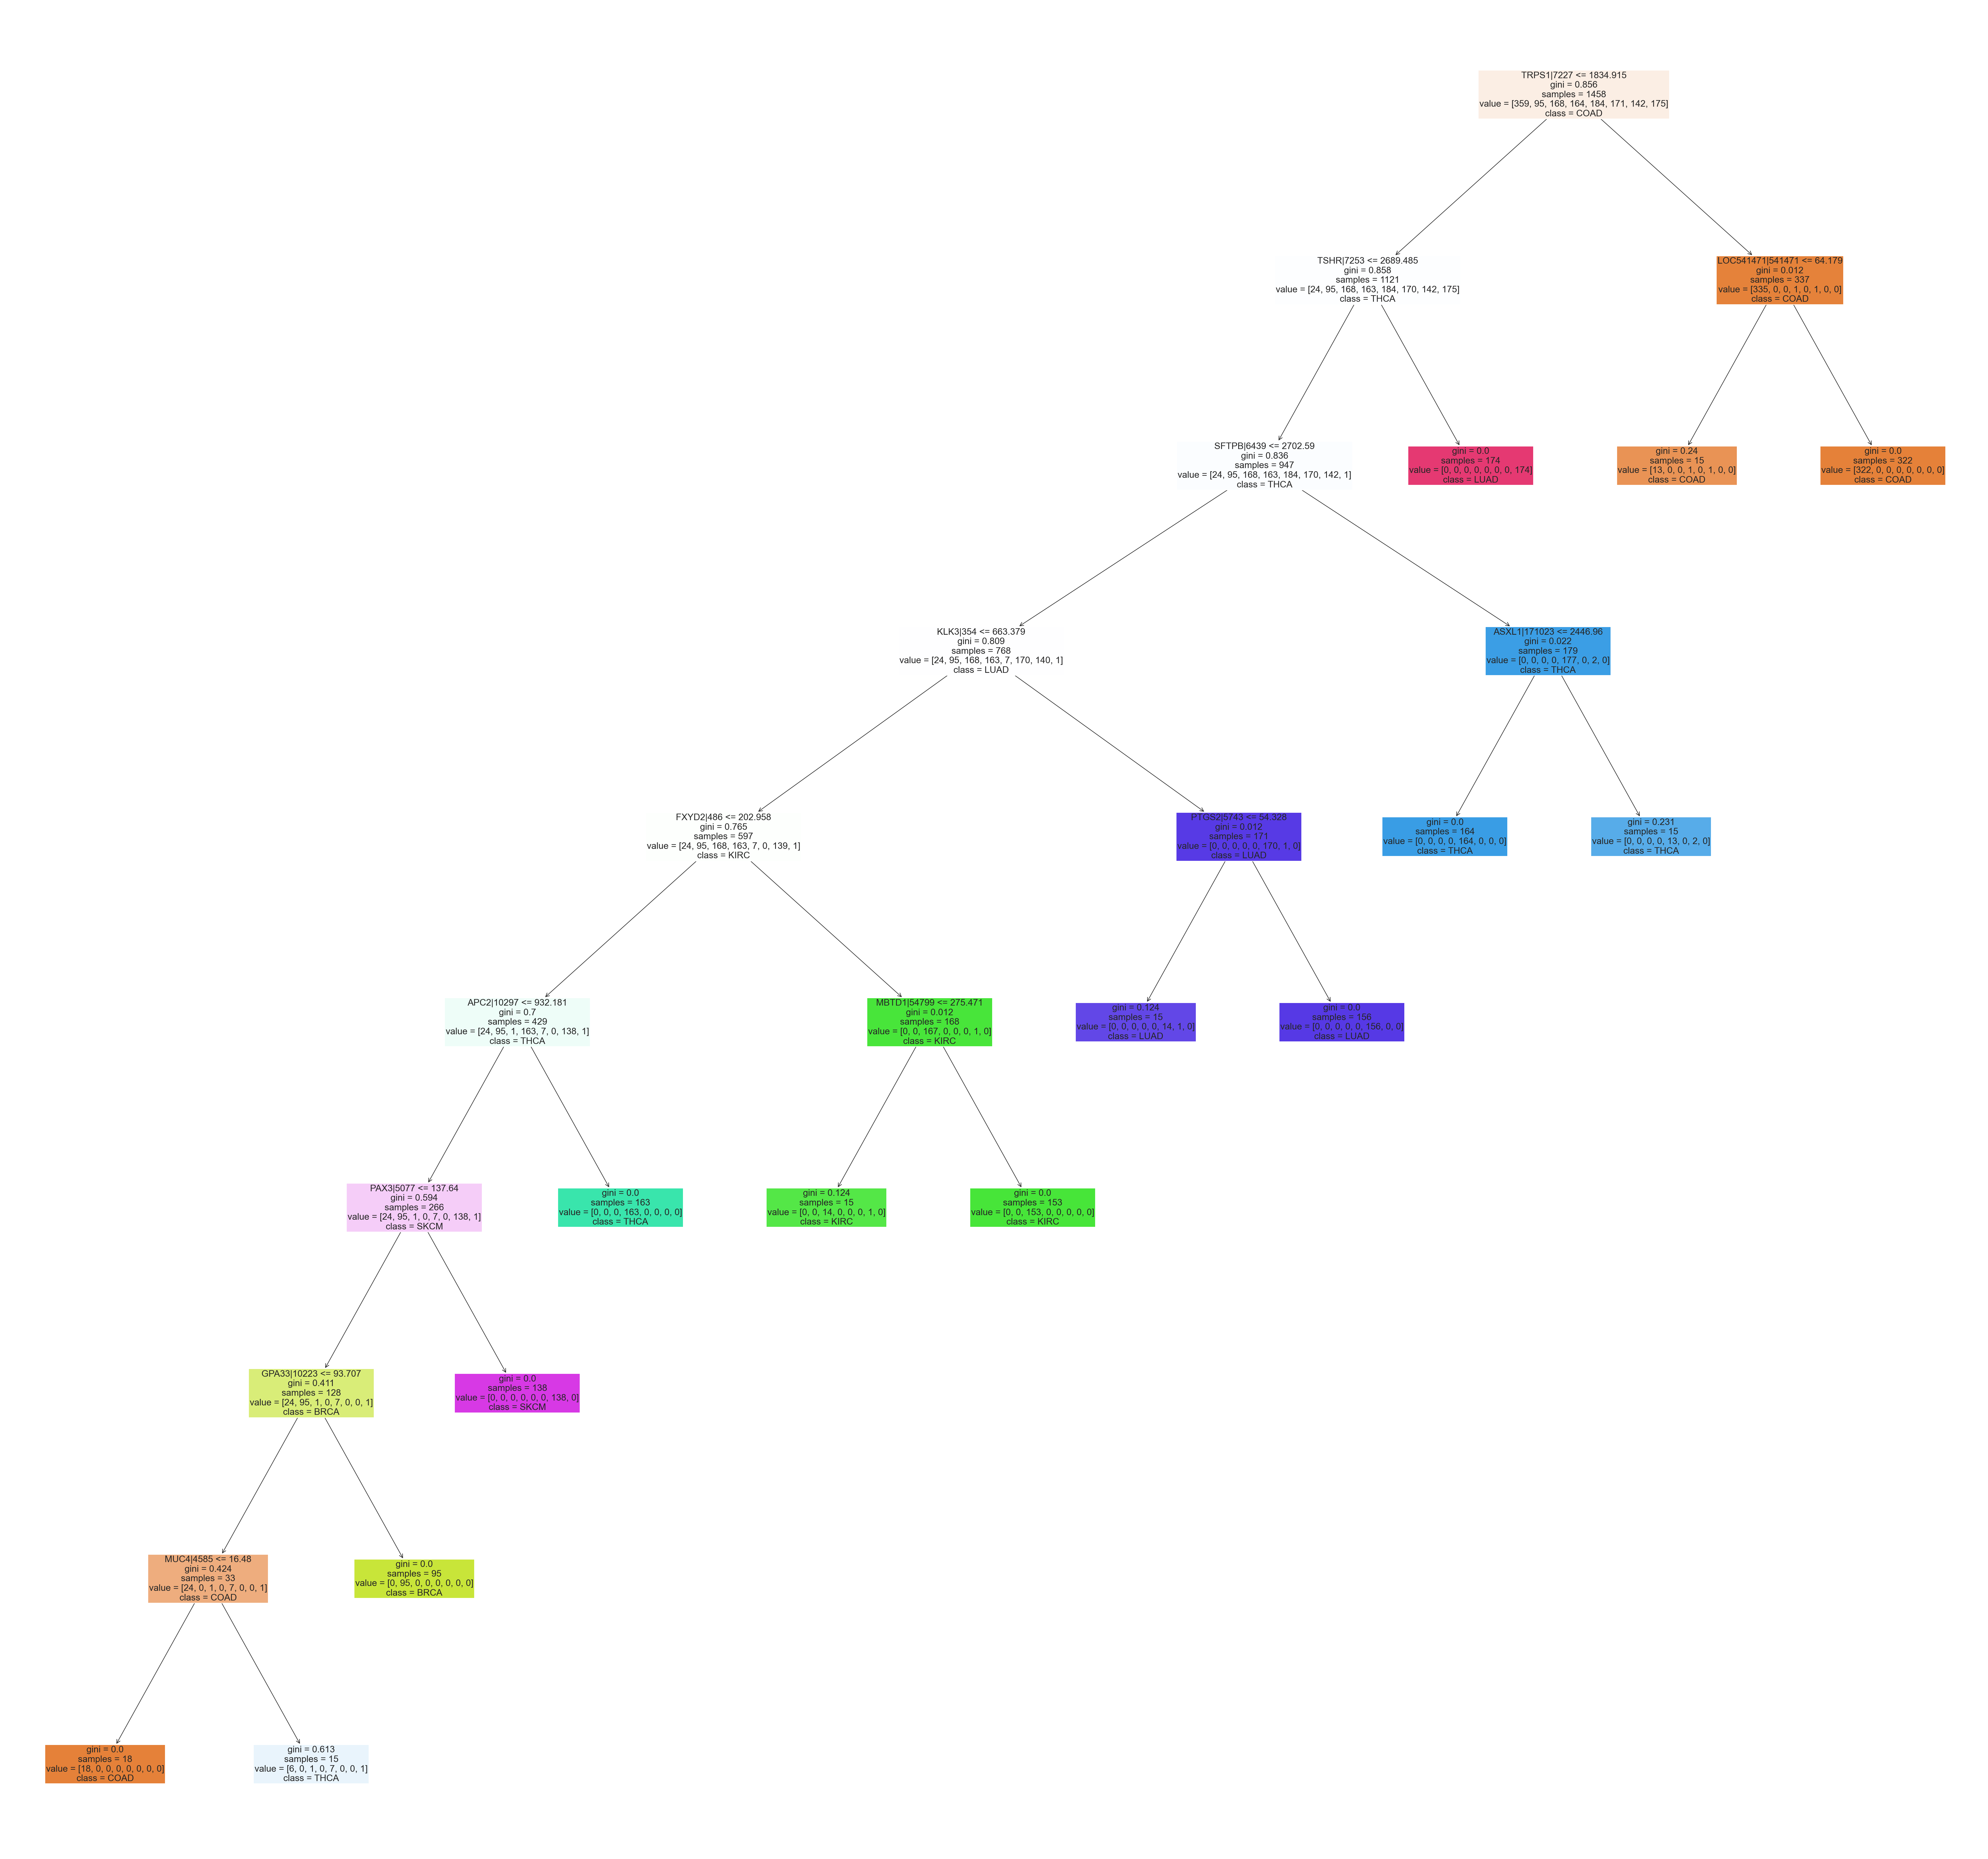

In [40]:
# plt.rcParams['font.size'] = 32
fig = plt.figure(figsize=(125,120))
_ = tree.plot_tree(dtree, 
                   feature_names=unc_mix_small.columns,  
                   class_names=y_train,
                   filled=True, 
                   fontsize=32)

In [41]:
dtree_a = accuracy_score(y_test, dtree_y_pred)
dtree_a

0.9876543209876543

In [42]:
dtree_r = sklearn.metrics.confusion_matrix(y_test, dtree_y_pred)
dtree_r

array([[118,   0,   0,   0,   3,   0,   0,   0],
       [  0,  37,   0,   0,   0,   0,   0,   0],
       [  0,   0,  57,   0,   0,   0,   0,   0],
       [  0,   0,   0,  57,   0,   0,   0,   0],
       [  0,   0,   0,   0,  58,   0,   0,   0],
       [  0,   0,   0,   0,   0,  48,   0,   0],
       [  2,   1,   0,   0,   0,   0,  42,   0],
       [  0,   0,   0,   0,   0,   0,   0,  63]], dtype=int64)

### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfm = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, random_state=101, 
                             max_features=None, min_samples_leaf=30)
rfm.fit(X_train, y_train)
rfm_y_pred = rfm.predict(X_test)

In [45]:
rfm_a = accuracy_score(y_test, rfm_y_pred)
rfm_a

0.9938271604938271

In [46]:
rfm_r = sklearn.metrics.confusion_matrix(y_test, rfm_y_pred)
rfm_r

array([[121,   0,   0,   0,   0,   0,   0,   0],
       [  0,  37,   0,   0,   0,   0,   0,   0],
       [  0,   0,  57,   0,   0,   0,   0,   0],
       [  0,   0,   0,  57,   0,   0,   0,   0],
       [  0,   0,   0,   0,  58,   0,   0,   0],
       [  0,   0,   0,   0,   0,  48,   0,   0],
       [  3,   0,   0,   0,   0,   0,  42,   0],
       [  0,   0,   0,   0,   0,   0,   0,  63]], dtype=int64)

### Support Vector Machine

In [47]:
from sklearn.svm import SVC

In [48]:
svm = SVC(kernel="linear", C=0.025, random_state=101)
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)

In [49]:
svm_a = accuracy_score(y_test, svm_y_pred)
svm_a

0.98559670781893

In [50]:
svm_r = sklearn.metrics.confusion_matrix(y_test, svm_y_pred)
svm_r

array([[119,   0,   0,   0,   0,   0,   1,   1],
       [  0,  37,   0,   0,   0,   0,   0,   0],
       [  0,   0,  56,   0,   0,   0,   1,   0],
       [  0,   0,   0,  57,   0,   0,   0,   0],
       [  1,   0,   0,   0,  56,   0,   0,   1],
       [  1,   0,   0,   0,   0,  47,   0,   0],
       [  1,   0,   0,   0,   0,   0,  44,   0],
       [  0,   0,   0,   0,   0,   0,   0,  63]], dtype=int64)

# Conclusion:
## For the traditiona machine learning models for this application (without hyperparameters optimization), the order of accuracy are: 
1. Random Forest (0.9959),  
2. Support Vector Machine (0.9938)
3. Stochastic Gradient Descent (0.9876), 
4. Naïve Bayes (0.9856), 
5. Decision Tree (0.9835), 
6. K-Nearest Neighbours (0.9527)

## Hyperparameter tuning:

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
def print_results(results):
    print('Best Params: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print( '{} (+/-{}) for {}'.format(round(mean, 3), round(std*2, 3), params))

In [ ]:
svm_hp = SVC(random_state=101)
svm_parameters = { 
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.025, 1, 10],
    'degree': [2, 3] ## only for ploy kernel
}
svm_cv = GridSearchCV(svm_hp, svm_parameters, cv=5)
svm_cv.fit(X_train, y_train)
print_results(svm_cv)